In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
#from sklearn import svm

In [ ]:
df = pd.read_csv("/content/Training Dataset.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['loanAmount_log']=np.log(df['LoanAmount'])

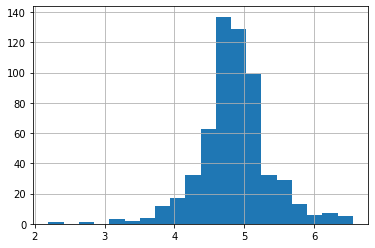

In [ ]:
df['loanAmount_log'].hist(bins=20)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

In [ ]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [ ]:
df['TotalIncome_log']=np.log(df['TotalIncome'])

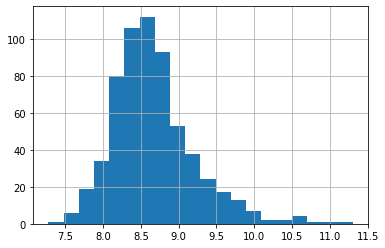

In [ ]:
df['TotalIncome_log'].hist(bins=20)

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True) 





In [ ]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())


In [ ]:
df.loanAmount_log = df.loanAmount_log .fillna(df.loanAmount_log.mean())


In [ ]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [ ]:
x=df.iloc[:,np.r_[1:5:,9:11,13:15]].values

In [ ]:
y=df.iloc[:,12].values

In [ ]:
x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [ ]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [ ]:
print("per missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

per missing gender is 0.000000%


number of people who take loan as group by gender:
Male      502
Female    112
Name: Gender, dtype: int64


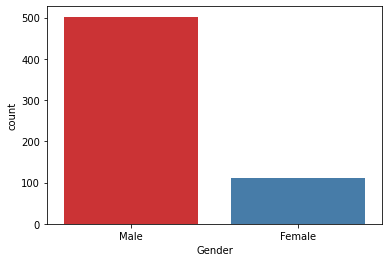

In [ ]:
print("number of people who take loan as group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set1')

number of people who take loan as group by martial status:
Yes    401
No     213
Name: Married, dtype: int64


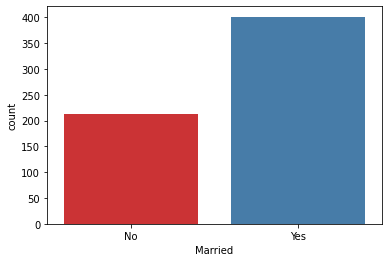

In [ ]:
print("number of people who take loan as group by martial status:")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

number of people who take loan as group by dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


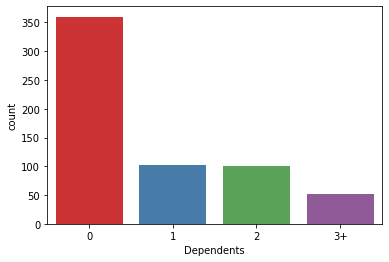

In [ ]:

print("number of people who take loan as group by dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set1')

number of people who take loan as group by self_employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


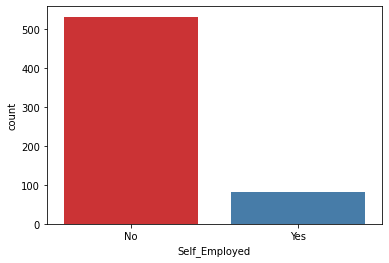

In [ ]:

print("number of people who take loan as group by self_employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set1')

number of people who take loan as group by LoanAmount:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


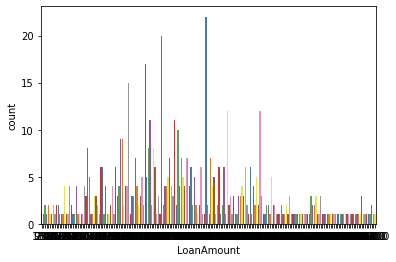

In [ ]:
print("number of people who take loan as group by LoanAmount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df,palette='Set1')

number of people who take loan as group by martial credit history:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


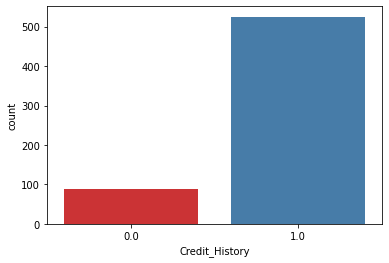

In [ ]:
print("number of people who take loan as group by martial credit history:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set1')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Labelencoder_x=LabelEncoder()

In [ ]:
for i in range(0,5):
  X_train[:,i]=Labelencoder_x.fit_transform(X_train[:,i])
  X_train[:,7]=Labelencoder_x.fit_transform(X_train[:,7])
X_train


array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [ ]:
Labelencoder_y=LabelEncoder()

In [ ]:
y_train=Labelencoder_y.fit_transform(y_train)

In [ ]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
for i in range(0,5):
  X_test[:,i]=Labelencoder_x.fit_transform(X_test[:,i])
  X_test[:,7]=Labelencoder_x.fit_transform(X_test[:,7])
X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [ ]:
Labelencoder_y=LabelEncoder()

In [ ]:
y_test= Labelencoder_y.fit_transform(y_test)

In [ ]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss= StandardScaler()

In [ ]:
X_train = ss.fit_transform(X_train)

In [ ]:
X_test = ss.fit_transform(X_test)

classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf=RandomForestClassifier()

In [ ]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics

In [ ]:

y_pred = rf_clf.predict(X_test)

In [ ]:
print("acc of random forest clf is ", metrics.accuracy_score(y_pred,y_test))

acc of random forest clf is  0.7804878048780488


GaussianNB clf

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_clf = GaussianNB()

In [ ]:
nb_clf.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred= nb_clf.predict(X_test)

In [ ]:
print("acc of gaussianNB clf is %  ", metrics.accuracy_score(y_pred,y_test))

acc of gaussianNB clf is %   0.8292682926829268


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()

In [ ]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred= dt_clf.predict(X_test)

In [ ]:
print("acc of DecisionTreeClassifier clf is %  ", metrics.accuracy_score(y_pred,y_test))

acc of DecisionTreeClassifier clf is %   0.7398373983739838


In [ ]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn_clf = KNeighborsClassifier()

In [ ]:
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = kn_clf.predict(X_test)
print("acc of KNeighborsClassifier clf is %  ", metrics.accuracy_score(y_pred,y_test))

acc of KNeighborsClassifier clf is %   0.7967479674796748


In [ ]:
y_pred 

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
testdata = pd.read_csv("/content/Test Dataset.csv")


In [ ]:
testdata.shape

(367, 12)

In [ ]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
testdata["Gender"].fillna(testdata["Gender"].mode()[0],inplace=True)
testdata["Dependents"].fillna(testdata["Dependents"].mode()[0],inplace=True)
testdata["Self_Employed"].fillna(testdata["Self_Employed"].mode()[0],inplace=True)
testdata["Loan_Amount_Term"].fillna(testdata["Loan_Amount_Term"].mode()[0],inplace=True)
testdata["Credit_History"].fillna(testdata["Credit_History"].mode()[0],inplace=True)

In [ ]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
testdata.LoanAmount=testdata.LoanAmount.fillna(testdata.LoanAmount.mean())

In [ ]:
testdata["LoanAmount_log"] = np.log(testdata["LoanAmount"])

In [ ]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [ ]:
testdata["TotalIncome"]= testdata["ApplicantIncome"]+ testdata["CoapplicantIncome"]
testdata["TotalIncome_log"]= np.log(testdata["TotalIncome"])

In [ ]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [ ]:
test = testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [ ]:
for i in range(0,5):
  test[:,i]=Labelencoder_x.fit_transform(test[:,i])

In [ ]:
test[:,7] = Labelencoder_x.fit_transform(test[:,7])

In [ ]:
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [ ]:
test= ss.fit_transform(test)

In [ ]:
pred = nb_clf.predict(test)

In [ ]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,